In [1]:
import os
import csv
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
# Function to create a binary mask from coordinates
# Function to create a binary mask from coordinates
def create_binary_mask(image_size, coordinates):
    mask = np.zeros(image_size, dtype=np.uint8)
    for coord in coordinates:
        for i in range(0, len(coord), 2):
            x, y = coord[i], coord[i+1]
            mask[y, x] = 255
    return mask

In [3]:
# Path to the folder containing images
image_folder = "/data1/vinod/mitosis/data/raw/A00_v2"

# Path to the folder containing CSV files with coordinates
csv_folder = "/data1/vinod/mitosis/data/raw/A00_v2"

Binary mask created for A00_01.png.


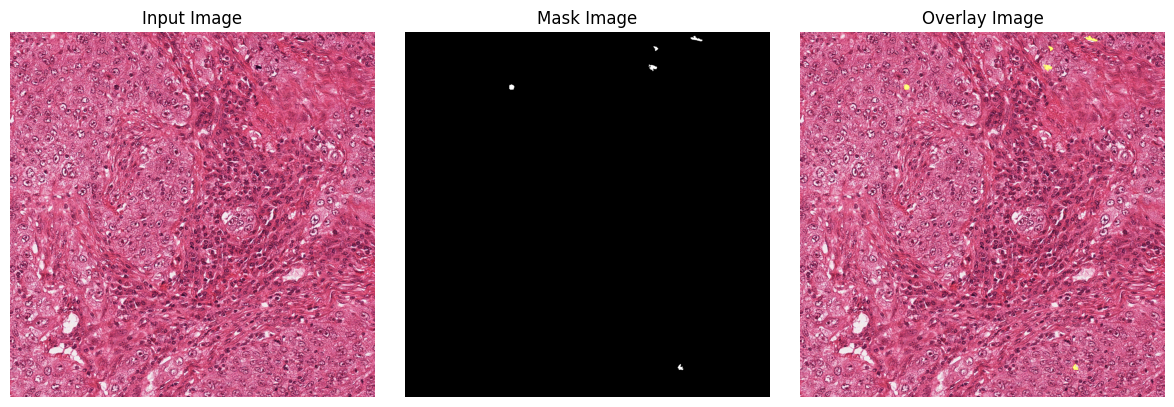

Binary mask created for A00_02.png.


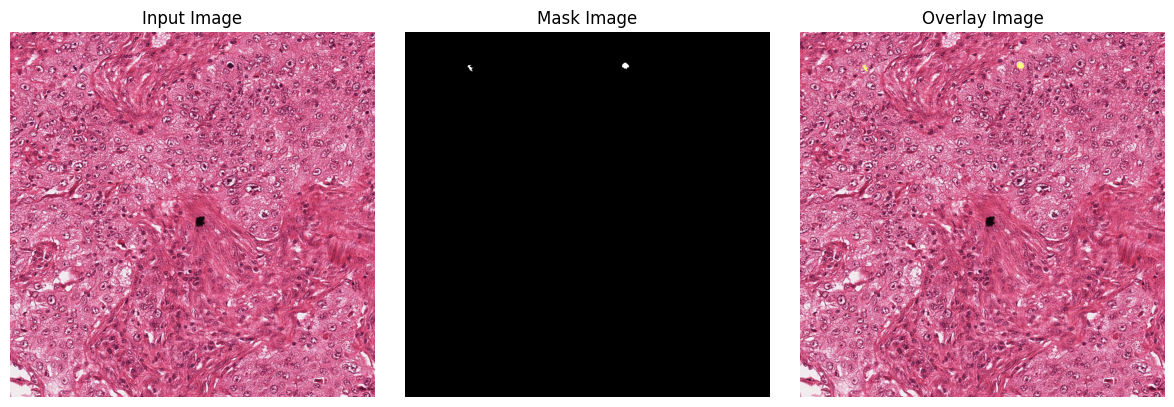

Binary mask created for A00_03.png.


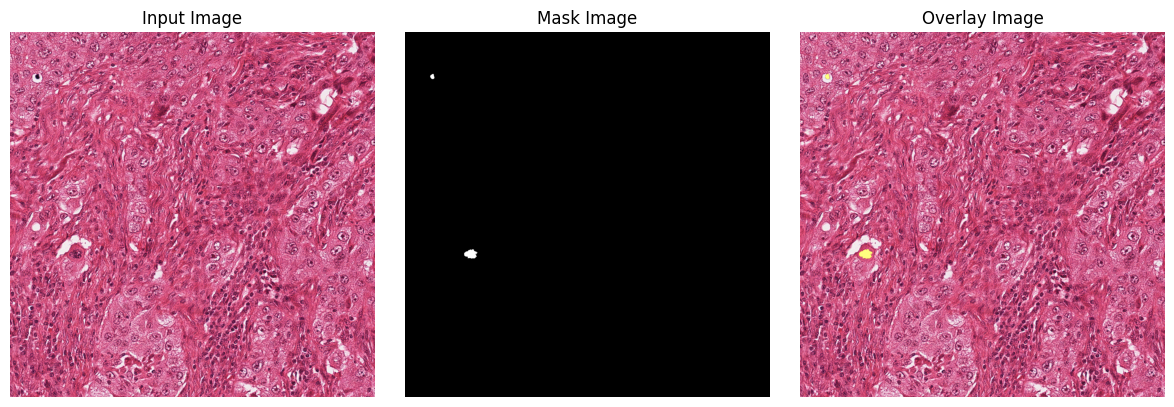

Binary mask created for A00_04.png.


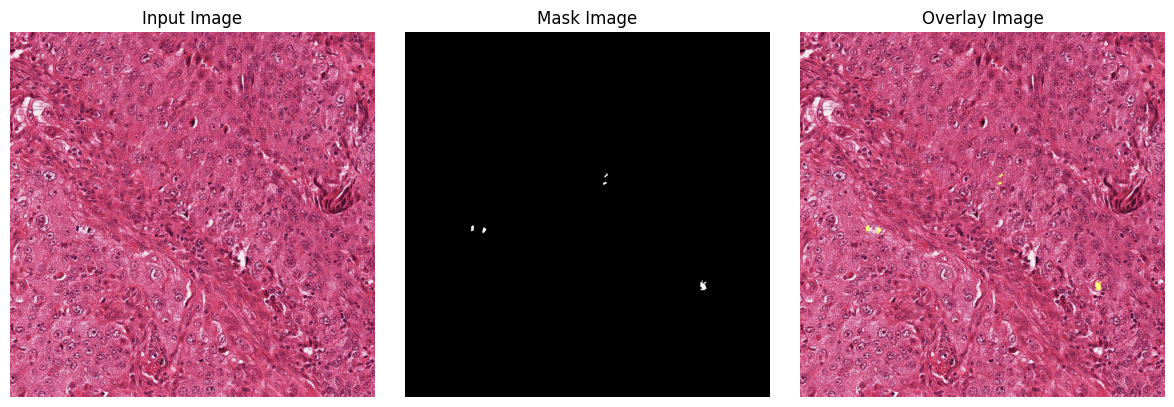

Binary mask created for A00_05.png.


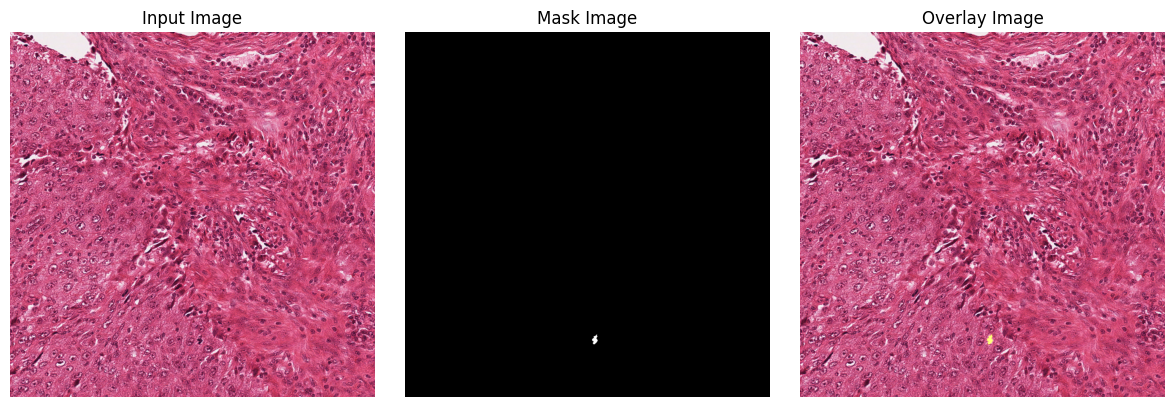

Binary mask created for A00_06.png.


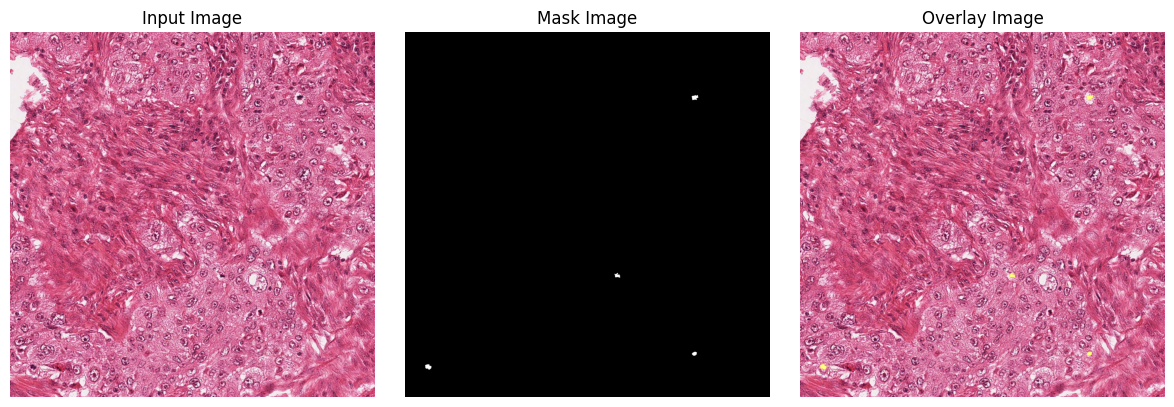

Binary mask created for A00_07.png.


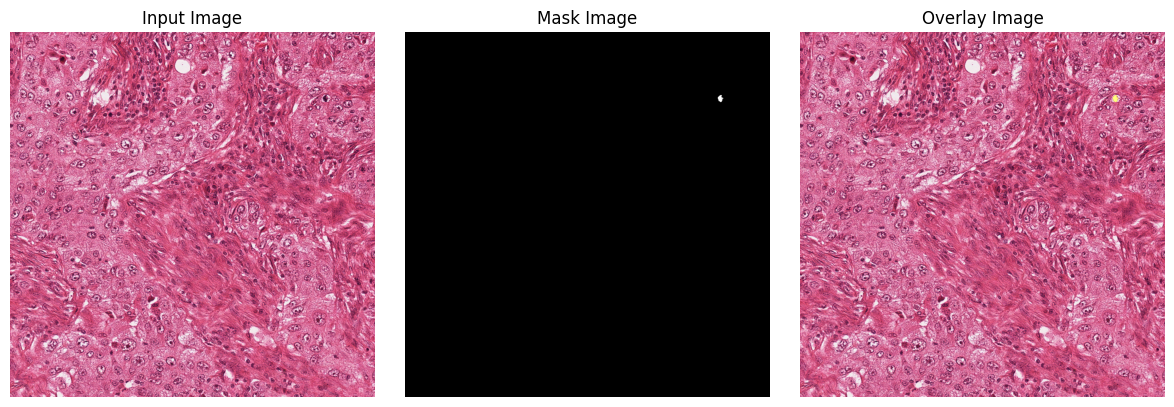

Binary mask created for A00_09.png.


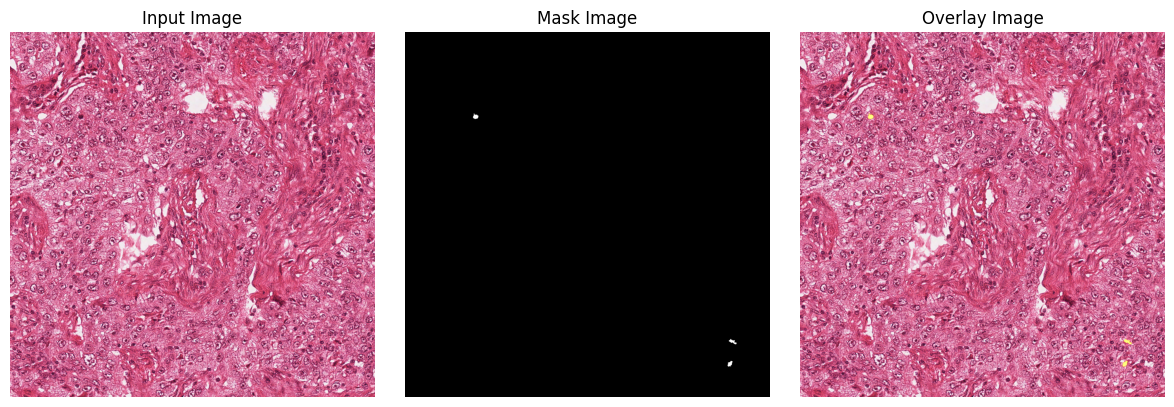

In [8]:
# Iterate over images in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".png"):
        image_path = os.path.join(image_folder, filename)

        # Load the image
        image = Image.open(image_path)
        image_size = image.size

        # Get the corresponding CSV file
        csv_filename = os.path.splitext(filename)[0] + ".csv"
        csv_path = os.path.join(csv_folder, csv_filename)
        # Check if the CSV file exists
        if os.path.exists(csv_path):
            # Read the CSV file and extract the coordinates
            coordinates = []
            with open(csv_path, 'r') as csv_file:
                csv_reader = csv.reader(csv_file)
                for row in csv_reader:
                    coordinates.append([int(coord) for coord in row])

            # Create the binary mask
            mask = create_binary_mask(image_size, coordinates)

            # Save the mask as a binary image
            mask_image = Image.fromarray(mask, mode='L')
            mask_filename = os.path.splitext(filename)[0] + "_mask.png"
            mask_path = os.path.join(image_folder, 'mask', mask_filename)
            mask_image.save(mask_path)
            print(f"Binary mask created for {filename}.")

            # Create overlay image
            overlay = image.convert("RGBA")
            overlay_data = overlay.load()
            mask_data = mask_image.load()
            for i in range(overlay.size[0]):
                for j in range(overlay.size[1]):
                    if mask_data[i, j] > 0:
                        overlay_data[i, j] = (255, 255, 0, 128)  # Yellow color with transparency

            # Plot the images side by side
            fig, axs = plt.subplots(1, 3, figsize=(12, 4))
            axs[0].imshow(image)
            axs[0].set_title("Input Image")
            axs[0].axis("off")

            axs[1].imshow(mask_image, cmap="gray")
            axs[1].set_title("Mask Image")
            axs[1].axis("off")

            axs[2].imshow(overlay)
            axs[2].set_title("Overlay Image")
            axs[2].axis("off")

            plt.tight_layout()
            plt.show()

        else:
            print(f"CSV file not found for {filename}. Skipping.")
